In [26]:
from __future__ import division
from Bio import SeqIO

### I want to know how much of each sequence is repeat masked

I will then see if the contigs in the GC bumps I observe are masked more than other contigs, which might tell me whether these GC bumps could be explained by repeats

In [28]:
hardmasked = SeqIO.parse(open("/home/djeffrie/Data/M_huetii_genome/REDmasked.hardmasked.fa", 'r'), "fasta")

Masked_proportions = {}

for record in hardmasked:
    perc_masked = record.seq.count("N")/len(record.seq)
    
    Masked_proportions[record.id] = perc_masked

Now get the bump2 and bump3 sequence IDs

In [31]:
### BUMP 2 ###

bump2_fa = SeqIO.parse(open("/home/djeffrie/Data/M_huetii_genome/Organelles/bump_2.fa", 'r'), "fasta")

bump2_ids = []

for record in bump2_fa:
    
    bump2_ids.append(record.id)
    
    
    
### BUMP 3 ###

bump3_fa = SeqIO.parse(open("/home/djeffrie/Data/M_huetii_genome/Organelles/bump_3.fa", 'r'), "fasta")

bump3_ids = []

for record in bump3_fa:
    
    bump3_ids.append(record.id)
        

And now make a histogram of the three bumps and their masked proportions

In [42]:
bump1_masked_proportions = []
bump2_masked_proportions = []
bump3_masked_proportions = []


for contig in Masked_proportions:
    
    if contig in bump2_ids:
        bump2_masked_proportions.append(Masked_proportions[contig])
    elif contig in bump3_ids:
        bump3_masked_proportions.append(Masked_proportions[contig])
    else:
        bump1_masked_proportions.append(Masked_proportions[contig])

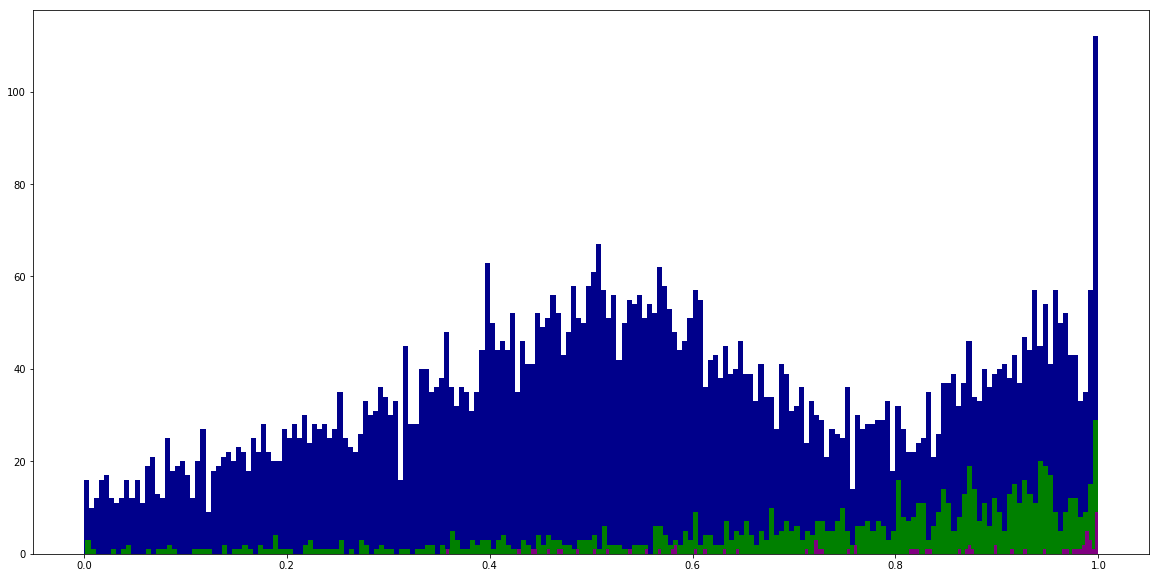

In [107]:
fig, ax1 = plt.subplots(figsize = (20,10))

ax1.hist(bump1_masked_proportions, bins = 200, color = 'darkblue')
ax1.hist(bump2_masked_proportions, bins = 200, color = 'green')
ax1.hist(bump3_masked_proportions, bins = 200, color = 'purple')

plt.show()

So, it does look like there is a higher higher masking proportion for contigs in these bumps. . . . however there is a large number of contigs not in those bumps which have a high masking count! Perhaps plotting GC directly against masking proportion will make things clearer?

In [53]:
blobs = open("/home/djeffrie/Data/M_huetii_genome/Organelles/blobtools.out.blobDB.table.txt", 'r').readlines()

GCs = {}

for line in blobs:
    if "#" not in line:
        ctg_id = line.split()[0]
        GC = line.split()[2]
        
        GCs[ctg_id] = GC
              

In [66]:
masked_props_list = []
GCs_list = []
for contig in Masked_proportions:
    masked_props_list.append(float(Masked_proportions[contig]))
    GCs_list.append(float(GCs[contig.split("|")[0]]))

Also want to try with sequence sizes

In [108]:
hardmasked = SeqIO.parse(open("/home/djeffrie/Data/M_huetii_genome/REDmasked.hardmasked.fa", 'r'), "fasta")

Contig_lengths = {}

for record in hardmasked:
    contig_length = len(record.seq)
    
    Contig_lengths[record.id] = contig_length

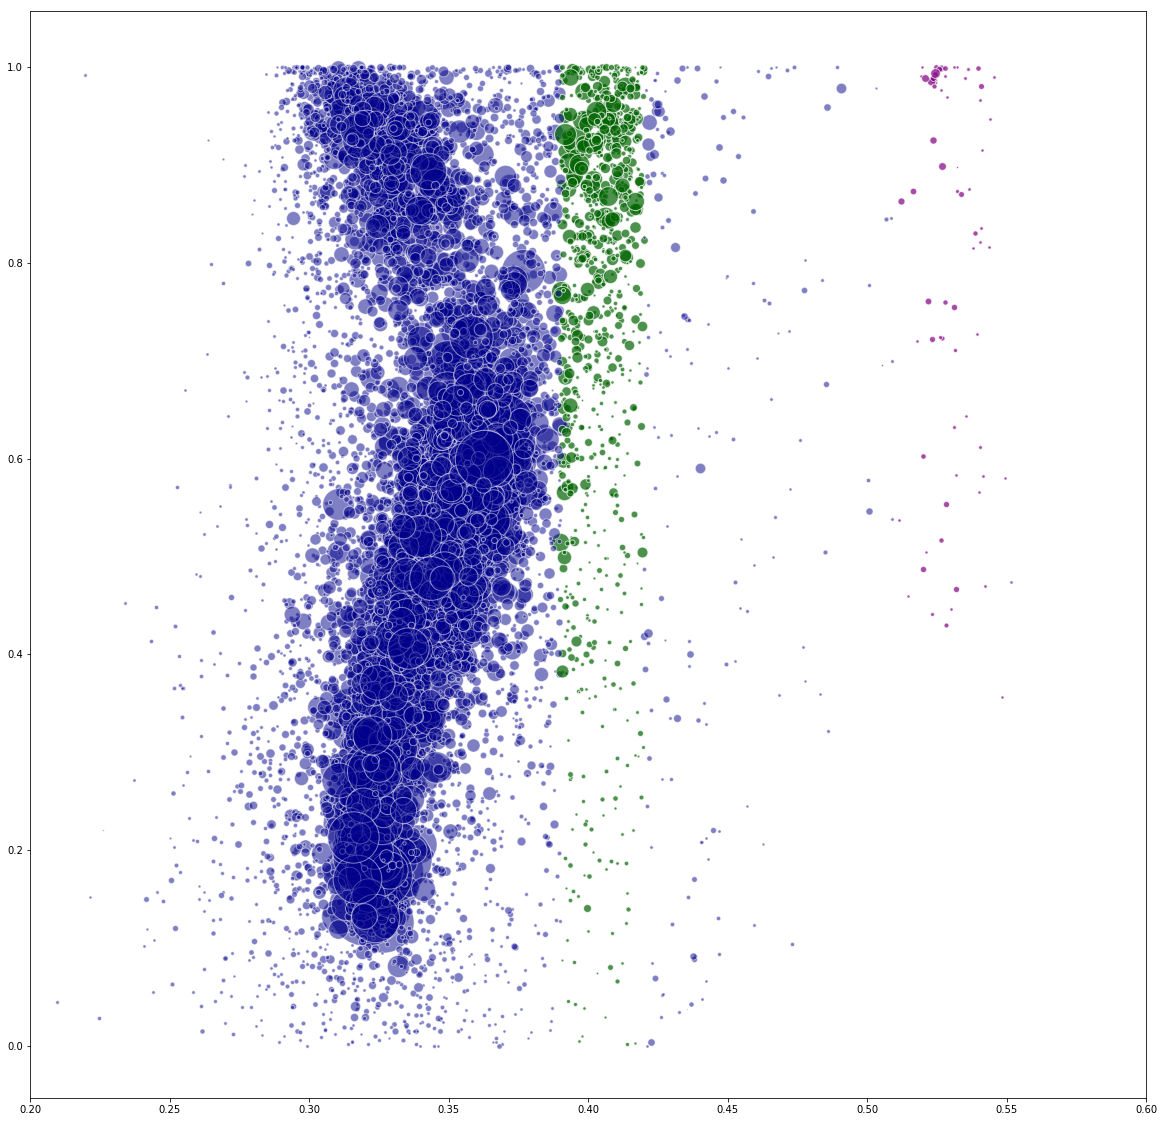

In [147]:
fig, ax1 = plt.subplots(figsize = (20,20))

#sns.kdeplot(GCs_list, masked_props_list, cmap="Blues", shade=True, bw=0.0075)

#ax2 = ax1.twinx()

for contig in Masked_proportions:
    if contig.split("|")[0] in GCs:
        if contig in bump2_ids:
            ax1.scatter(float(GCs[contig.split("|")[0]]), float(Masked_proportions[contig]), color = "darkgreen", edgecolors = "white", alpha = 0.7, s = Contig_lengths[contig]/500)
        elif contig in bump3_ids:
            ax1.scatter(float(GCs[contig.split("|")[0]]), float(Masked_proportions[contig]), color = "purple", edgecolors = "white", alpha = 0.7, s = Contig_lengths[contig]/500)
        else:
            ax1.scatter(float(GCs[contig.split("|")[0]]), float(Masked_proportions[contig]), color = "darkblue", edgecolors = "white", alpha = 0.5, s = Contig_lengths[contig]/500)

plt.xlim(0.2,0.6)
plt.savefig("/home/djeffrie/Data/M_huetii_genome/Organelles/Bumps_GC_vs_masked.pdf")
plt.show()

Make some histograms to go above and to the side (I cant be bothered to do this in the same plot)

In [145]:
## add a 0 and 1 entry to all the lists so the histograms have the same range and thus bining
bump1_masked_proportions.append(0)
bump1_masked_proportions.append(1)
bump2_masked_proportions.append(0)
bump2_masked_proportions.append(1)
bump3_masked_proportions.append(0)
bump3_masked_proportions.append(1)

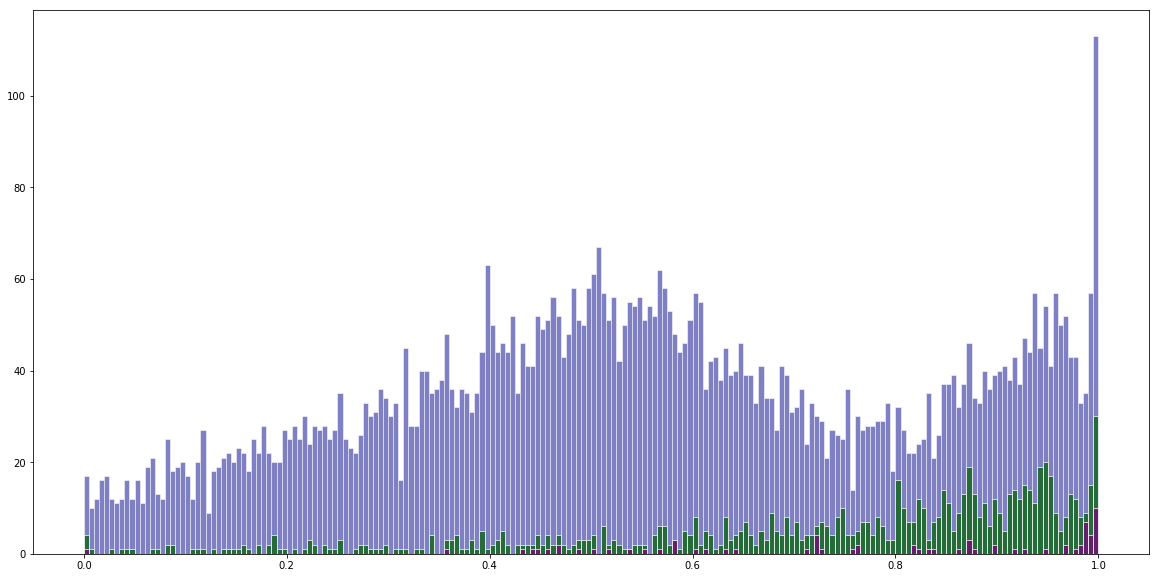

In [149]:
fig, ax1 = plt.subplots(figsize = (20,10))

ax1.hist(bump1_masked_proportions, bins = 200, color = 'darkblue', alpha = 0.5, edgecolor = "white")
ax1.hist(bump2_masked_proportions, bins = 200, color = 'darkgreen', alpha = 0.7, edgecolor = "white")
ax1.hist(bump3_masked_proportions, bins = 200, color = 'purple', alpha = 0.7, edgecolor = "white")

plt.savefig("/home/djeffrie/Data/M_huetii_genome/Organelles/Masked_proportion_hist.pdf")
plt.show()

In [143]:
bump1_GCs = []
bump2_GCs = []
bump3_GCs = []


for contig in Masked_proportions:
    
    if contig in bump2_ids:
        bump2_GCs.append(float(GCs[contig.split("|")[0]]))
    elif contig in bump3_ids:
        bump3_GCs.append(float(GCs[contig.split("|")[0]]))
    else:
        bump1_GCs.append(float(GCs[contig.split("|")[0]]))
        
## add a 0 and 1 entry to the lists so the histograms have the same range and thus bining


bump1_GCs.append(0)
bump1_GCs.append(1)
bump2_GCs.append(0)
bump2_GCs.append(1)
bump3_GCs.append(0)
bump3_GCs.append(1)


In [142]:
import numpy as np

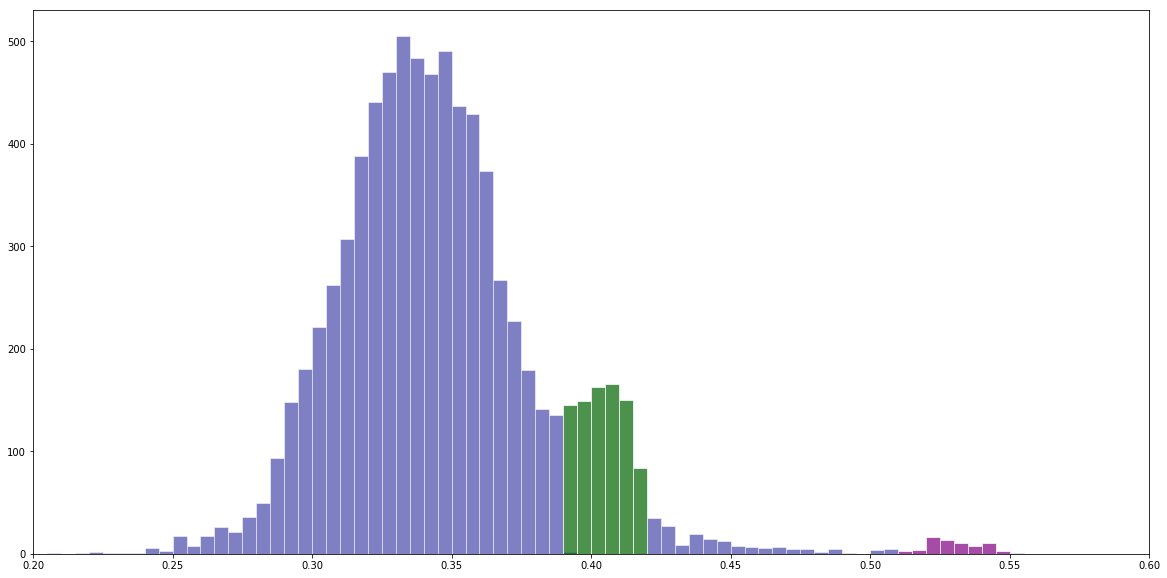

In [150]:
fig, ax1 = plt.subplots(figsize = (20,10))

ax1.hist(bump1_GCs, bins = 200, color = 'darkblue', alpha = 0.5, edgecolor = "white")
ax1.hist(bump2_GCs, bins = 200, color = 'darkgreen', alpha = 0.7, edgecolor = "white")
ax1.hist(bump3_GCs, bins = 200, color = 'purple', alpha = 0.7, edgecolor = "white")

plt.xlim(0.2,0.6)
plt.savefig("/home/djeffrie/Data/M_huetii_genome/Organelles/GC_proportion_hist.pdf")

plt.show()